In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Crop_production.csv")

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [7]:
df.shape

(246091, 7)

In [8]:
df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [9]:
df['Production'].isna().sum()

3730

In [10]:
Frames=[]
for i in list (set(df['District_Name'])):
  df_district=df[df['District_Name']==i]
  df_district['Production'].fillna(df_district['Production'].mean(),inplace=True)
  Frames.append(df_district)
  final_df= pd.concat(Frames)

C:\Users\Debasish Jena\AppData\Local\Temp\ipykernel_1820\1364440849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district['Production'].fillna(df_district['Production'].mean(),inplace=True)


In [11]:
final_df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
dtype: bool

In [12]:
final_df.duplicated(subset=None,keep='first').any()

False

### **Checking for correlation between variables**

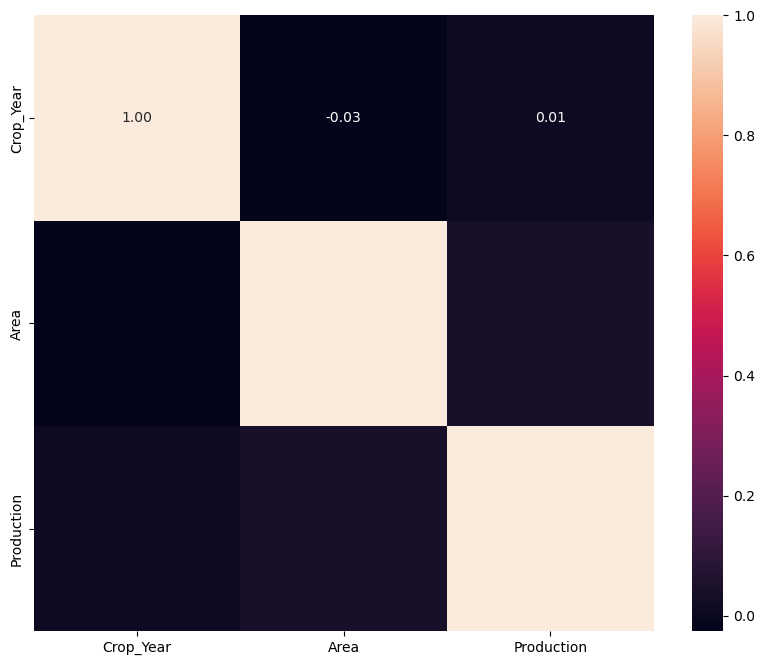

In [14]:
# Filter out non-numeric columns
numeric_df = final_df.select_dtypes(include=[float, int])

# Calculate correlation on numeric data
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

**Result :** There is no high relationship between any variables

## **Univariate Analysis**

### **State Name variable**

In [15]:
print(final_df['State_Name'].nunique())
print(final_df['State_Name'].unique())

33
['Jammu and Kashmir ' 'Mizoram' 'Nagaland' 'Tripura' 'Kerala'
 'Madhya Pradesh' 'Punjab' 'Jharkhand' 'Maharashtra' 'West Bengal' 'Assam'
 'Uttarakhand' 'Puducherry' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Himachal Pradesh' 'Tamil Nadu' 'Haryana' 'Gujarat' 'Uttar Pradesh' 'Goa'
 'Arunachal Pradesh' 'Bihar' 'Manipur' 'Rajasthan' 'Telangana '
 'Karnataka' 'Odisha' 'Meghalaya' 'Andaman and Nicobar Islands' 'Sikkim'
 'Andhra Pradesh' 'Chandigarh']


In [16]:
final_df['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

**Result:** We have totally 33 unique states and we have more data from the top rich agriculture states like Uttar pradhesh , Madhya Pradesh and Karnataka

### **District Name variable**

In [17]:
print(final_df['District_Name'].nunique())
print(final_df['District_Name'].unique())

646
['BADGAM' 'KOLASIB' 'WOKHA' 'KHOWAI' 'THRISSUR' 'SHEOPUR' 'S.A.S NAGAR'
 'CHATRA' 'CHANDRAPUR' 'DINAJPUR DAKSHIN' 'SONITPUR' 'CHAMOLI' 'KOLHAPUR'
 'BANDIPORA' 'KARAIKAL' 'JANJGIR-CHAMPA' 'DADRA AND NAGAR HAVELI' 'MANDI'
 'MANSA' 'KANCHIPURAM' 'JHAJJAR' 'NAVSARI' 'DEORIA' 'SOUTH GOA' 'ANJAW'
 'AHMADABAD' 'MON' 'SUPAUL' 'CHURACHANDPUR' 'UDAIPUR' 'NAINITAL' 'KANKER'
 'KARIMNAGAR' 'CUDDALORE' 'BETUL' 'MUZAFFARPUR' 'PURBI CHAMPARAN'
 'DIMA HASAO' 'HARIDWAR' 'BAGHPAT' 'LUCKNOW' 'WEST KAMENG' 'SAGAR' 'BANDA'
 'SIRSA' 'LOHIT' 'LUDHIANA' 'DUNGARPUR' 'KOLAR' 'SUNDARGARH' 'BHOJPUR'
 'UMARIA' 'BARAN' 'DHAMTARI' 'PAPUM PARE' 'PARBHANI' 'KHARGONE'
 'EAST KHASI HILLS' 'MANDLA' 'KAMRUP METRO' 'KATNI' 'AJMER' 'SALEM'
 'BALAGHAT' 'DHALAI' 'UDUPI' 'NEEMUCH' 'JHANSI' 'JASHPUR' 'BEGUSARAI'
 'KARGIL' 'LATUR' 'SOUTH ANDAMANS' 'PAURI GARHWAL' 'HINGOLI' 'LAKHISARAI'
 'ADILABAD' 'SANT RAVIDAS NAGAR' 'KARBI ANGLONG' 'SHEOHAR' 'NARAYANPUR'
 'VAISHALI' 'GARIYABAND' 'TIRUCHIRAPPALLI' 'GULBARGA' 'AGAR MALWA'
 'B

In [18]:
final_df['District_Name'].value_counts()

District_Name
BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
MUMBAI         1
NAMSAI         1
Name: count, Length: 646, dtype: int64

**Result** : On district front we have more data coming from Bijapur , Tumkur followed by Belgaum , Hassan and Bellary

### **Crop year variable** 

In [19]:
print(final_df['Crop_Year'].nunique())
print(final_df['Crop_Year'].max())
print(final_df['Crop_Year'].min())

19
2015
1997


In [20]:
final_df.Crop_Year.value_counts()

Crop_Year
2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: count, dtype: int64

**Result** : Data consists for India crop production from 1997 to 2015 , more vital data from 2003 and 2002.

### **Season variable**

In [21]:
final_df['Season'].nunique()

6

In [22]:
final_df['Season'].max()

'Winter     '

In [23]:
final_df['Season'].value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

**Result** : More crops has been yeilded on winter season but more data points from Kharif followed by Rabi and whole year season

### **Crop variable** 

In [24]:
print(final_df['Crop'].nunique())
print(final_df.Crop.value_counts().head(10))

124
Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: count, dtype: int64


In [25]:
final_df['Crop'].max()

'other oilseeds'

In [26]:
final_df['Crop'].unique()

array(['Maize', 'Rice', 'Wheat', 'Cond-spcs other', 'Linseed',
       'Rapeseed &Mustard', 'Dry chillies', 'Garlic', 'Onion',
       'Moong(Green Gram)', 'Urad', 'Peas & beans (Pulses)', 'Potato',
       'Moth', 'Other Kharif pulses', 'Other  Rabi pulses',
       'Other Fresh Fruits', 'Other Vegetables', 'Arhar/Tur', 'Groundnut',
       'Kapas', 'Sesamum', 'Soyabean', 'Tobacco', 'Sugarcane', 'Tapioca',
       'Cotton(lint)', 'other oilseeds', 'Masoor', 'Gram', 'Bajra',
       'Jowar', 'Jute', 'Castor seed', 'Sunflower', 'Tea', 'Niger seed',
       'Small millets', 'Barley', 'Cardamom', 'Dry ginger', 'Turmeric',
       'Mesta', 'Ragi', 'Horse-gram', 'Ginger', 'Sweet potato',
       'Blackgram', 'Bean', 'Colocosia', 'Jobster', 'Perilla',
       'Rajmash Kholar', 'Ricebean (nagadal)', 'Lentil', 'Oilseeds total',
       'Arecanut', 'Black pepper', 'Cashewnut', 'Coconut ', 'Banana',
       'Rubber', 'Bhindi', 'Bitter Gourd', 'Brinjal', 'Cashewnut Raw',
       'Drum Stick', 'Jack Fruit', 'Ma

**Result** : 124 Unique crops available

In [27]:
final_df.Production.describe()

count    2.460910e+05
mean     6.069226e+05
std      1.696894e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.880000e+02
75%      7.870000e+03
max      1.250800e+09
Name: Production, dtype: float64

**Result**: Production value ranges from 0 to 1250800

{'whiskers': [<matplotlib.lines.Line2D at 0x20886379450>,
 'caps': [<matplotlib.lines.Line2D at 0x20892e07850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2089016ce50>],
 'medians': [<matplotlib.lines.Line2D at 0x20892e14a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20892e15310>],
 'means': []}

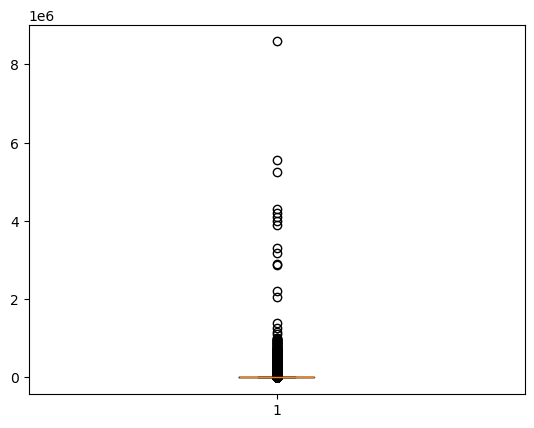

In [28]:
plt.boxplot(final_df.Area)

{'whiskers': [<matplotlib.lines.Line2D at 0x20892e606d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20892e61a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20892e57cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20892e62bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20892e63510>],
 'means': []}

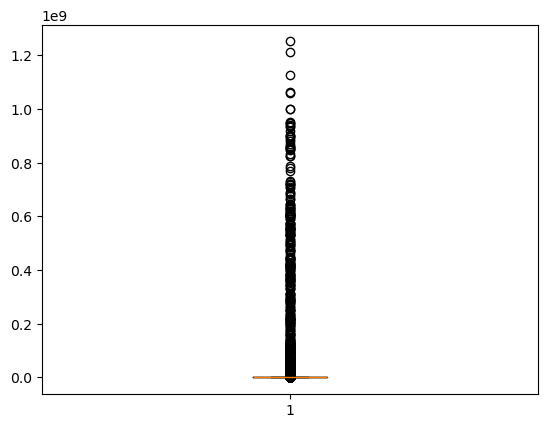

In [29]:
plt.boxplot(final_df.Production)

**Result:** The area under cultivation and production is highly skewed and has many outliers

## **Bivariate Analysis**

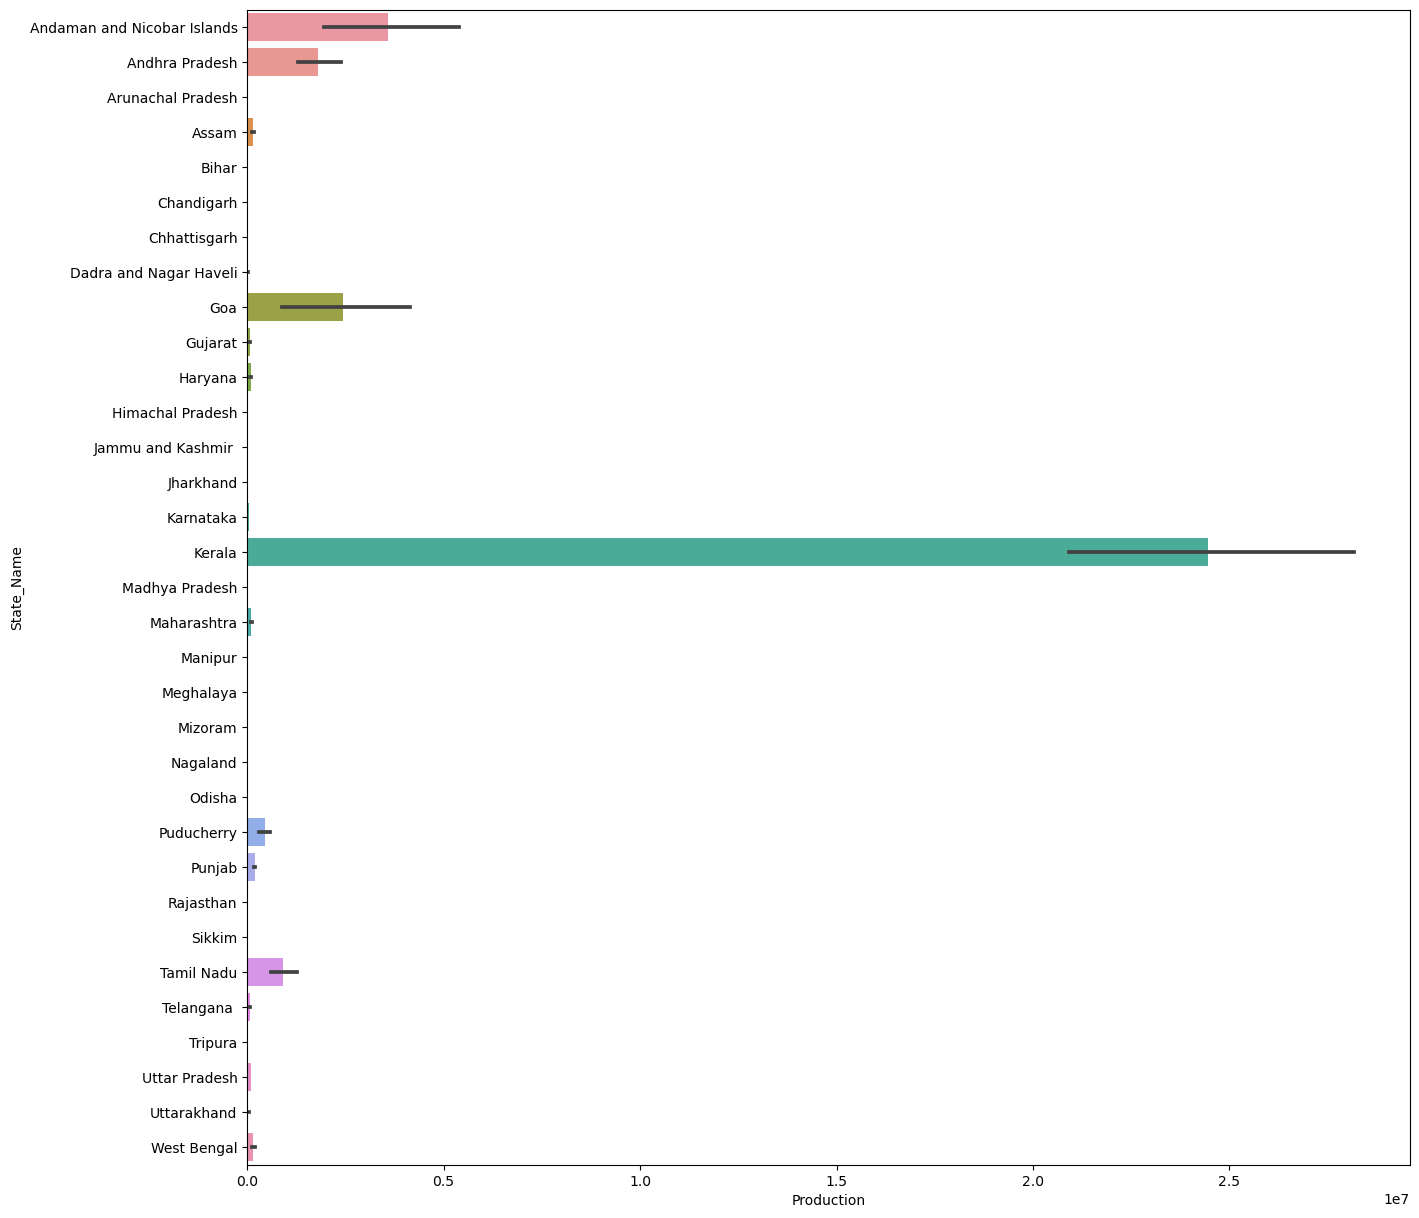

In [30]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['Production'],y= df["State_Name"], orient='h');

**Result** : Kerala has yeilded the highest production 

## **New variables**

In [31]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [32]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

final_df['Zones'] = final_df.apply(get_zonal_names, axis=1)
final_df['Zones'].unique()

array(['North Zone', 'NE Zone', 'South Zone', 'Central Zone', 'East Zone',
       'West Zone', 'Union Terr'], dtype=object)

In [33]:
final_df['Zones'].value_counts()

Zones
South Zone      54207
North Zone      51468
East Zone       43339
West Zone       33786
Central Zone    33652
NE Zone         28297
Union Terr       1342
Name: count, dtype: int64

In [37]:
crop=final_df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

final_df['cat_crop']=final_df['Crop'].apply(cat_crop)

In [35]:
final_df['cat_crop'].value_counts()

cat_crop
Cereal        63800
Pulses        41689
oilseeds      34454
Vegetables    23325
spices        21986
Nuts          11588
Commercial    10716
fibres        10195
Beans          9355
Fruits         6243
Name: count, dtype: int64

## **Findings and Visualisations**

### **Zone wise production**

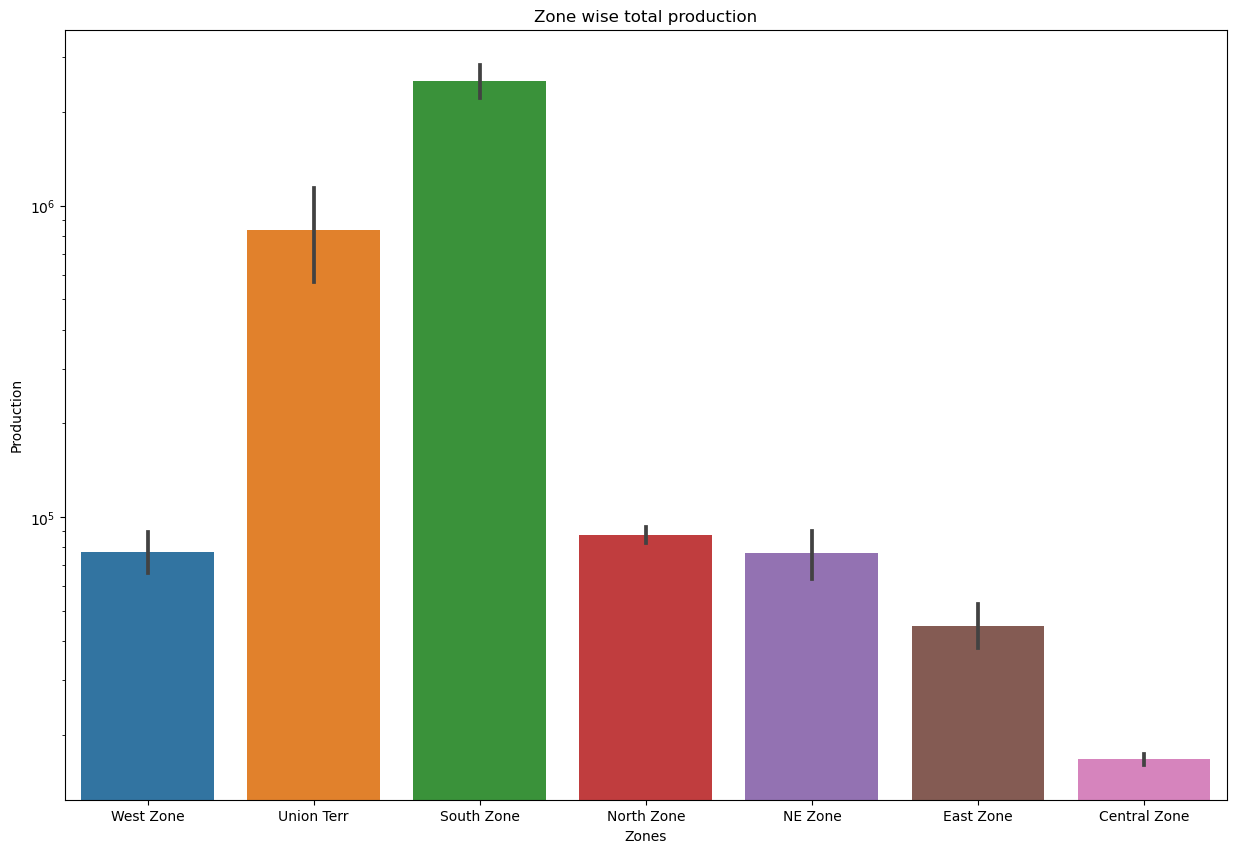

In [38]:
fig, ax = plt.subplots(figsize=(15, 10))

# Correct usage with keyword arguments
sns.barplot(x=final_df.Zones.sort_values(ascending=False), y=final_df.Production, ax=ax)

plt.yscale('log')
plt.title('Zone wise total production')
plt.show()

**Result :** South zone supplies the highest production followed by the union territories

### **Analysing the state in south zone which produces the highest production**

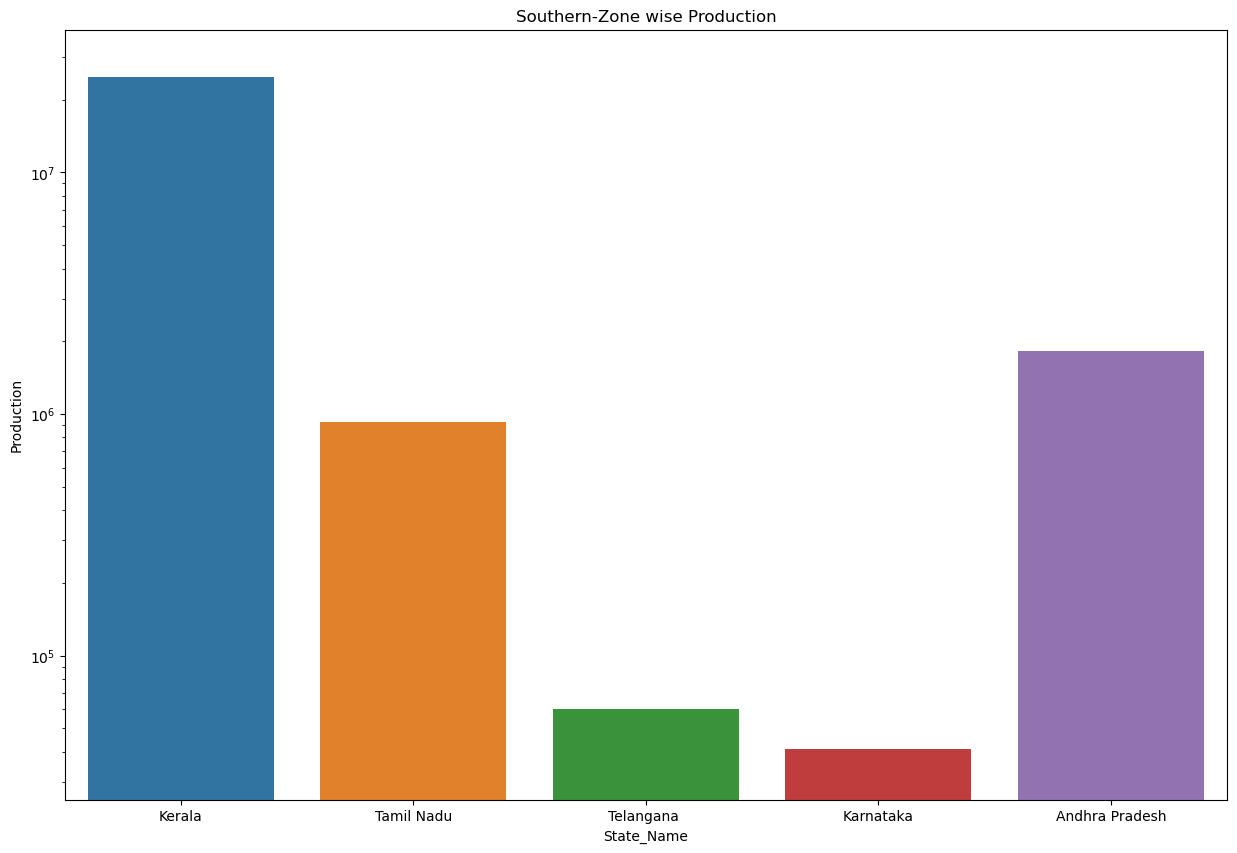

In [40]:
south_zone = final_df[(final_df["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15, 10))

# Use keyword arguments for x and y
sns.barplot(x=south_zone.State_Name, y=south_zone.Production, errwidth=0, ax=ax)

plt.yscale('log')
plt.title('Southern-Zone wise Production')
plt.show()

**Result** : Kerala provides the highest production in south zone

### **Analysing the district zone in kerala which gives the highest production**

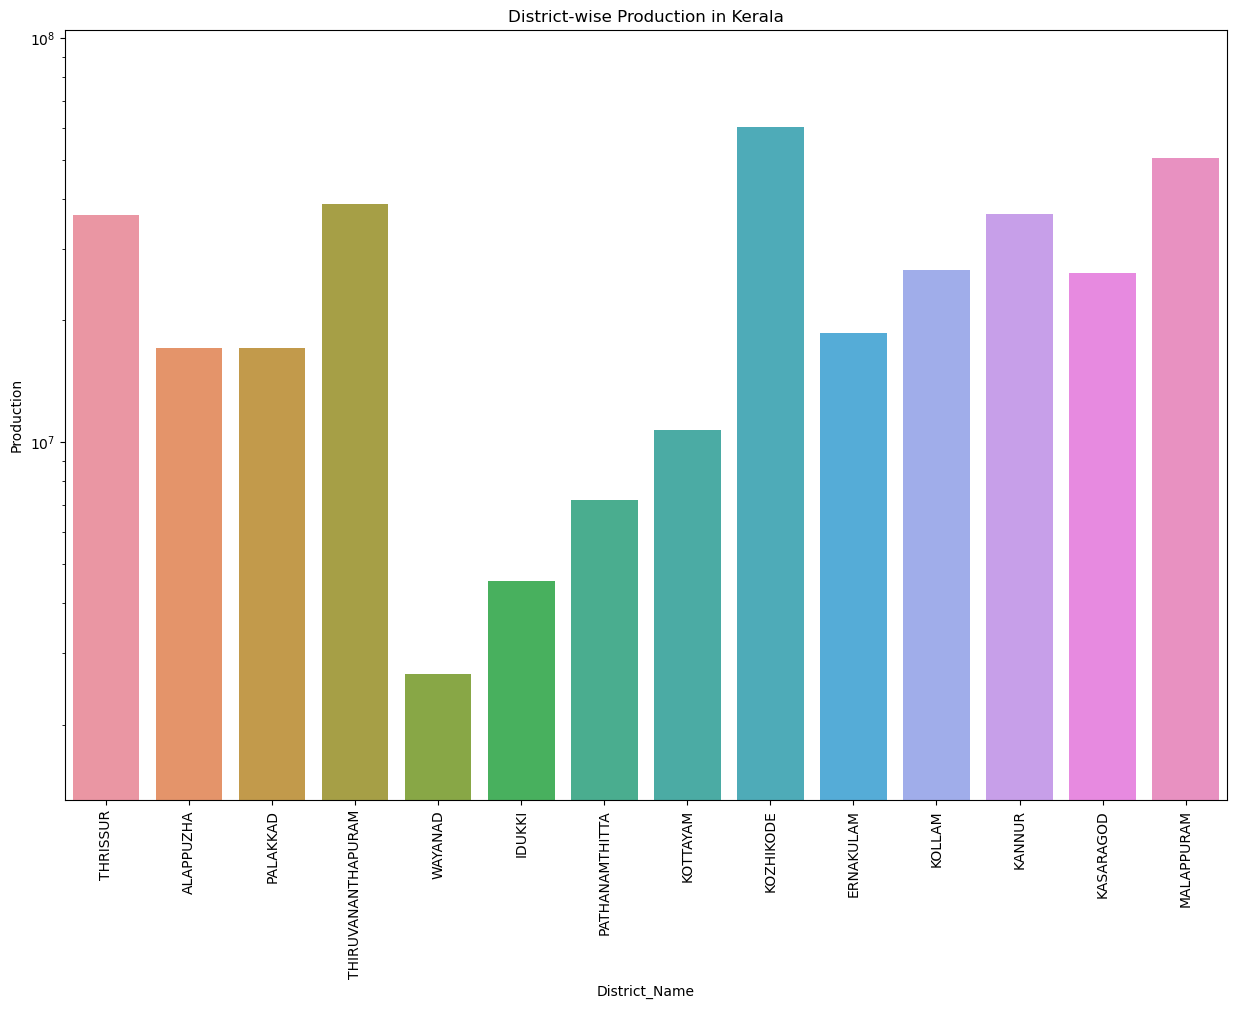

In [42]:
Kerala = final_df[(final_df["State_Name"] == 'Kerala')]
fig, ax = plt.subplots(figsize=(15, 10))

# Use keyword arguments for x and y
sns.barplot(x=Kerala.District_Name, y=Kerala.Production, errwidth=0, ax=ax)

plt.yscale('log')
plt.xticks(rotation=90)
plt.title('District-wise Production in Kerala')
plt.show()

**Result** : Kozhikode , Malappuram and Thiruvananthapuram gives the highest production in Kerala state

### **Crop wise production**

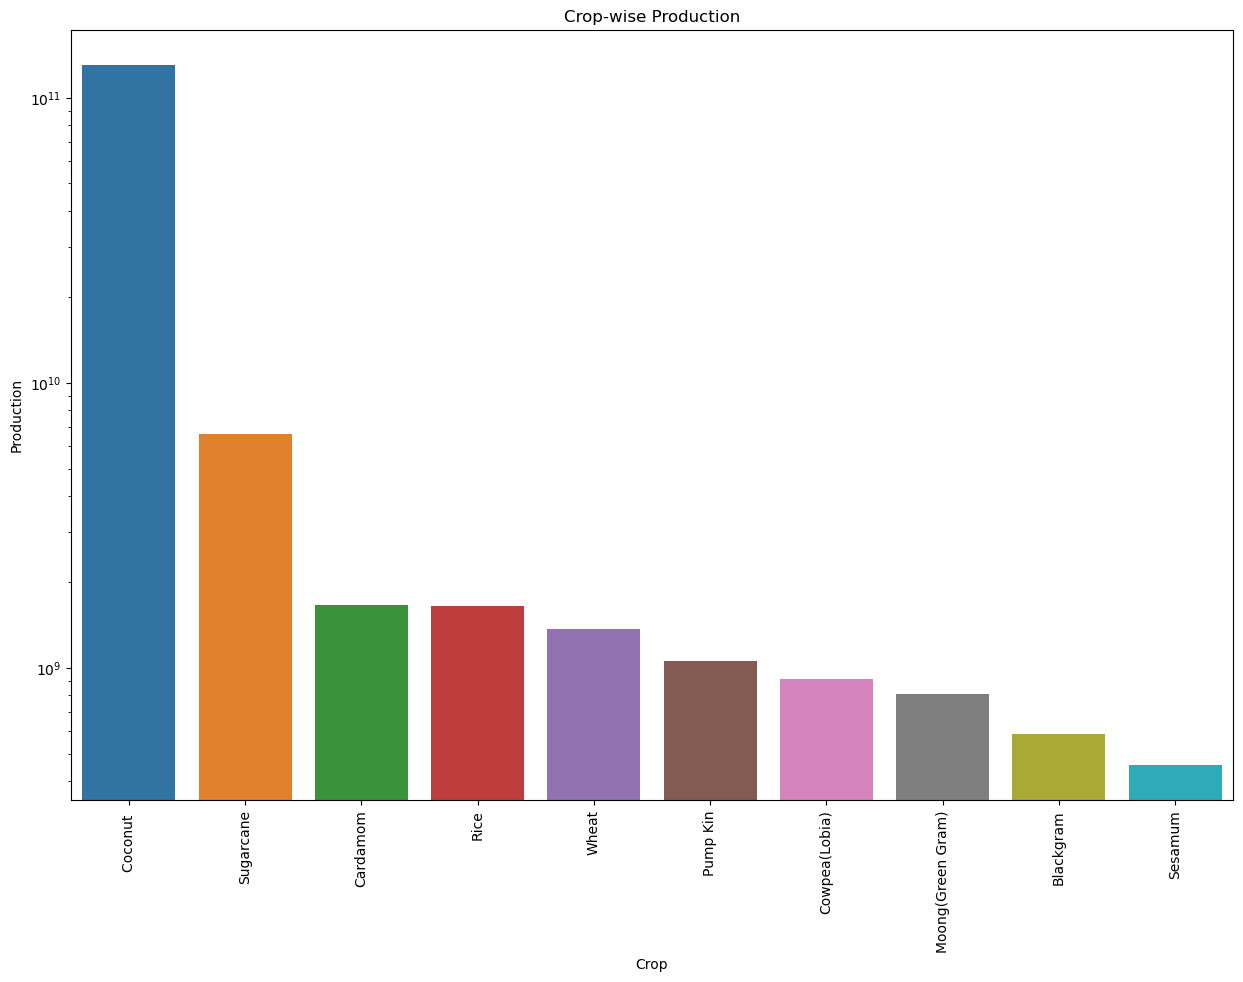

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))

# Use keyword arguments for x and y
sns.barplot(x=crop.Crop, y=crop.Production, ax=ax)

plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Crop-wise Production')
plt.show()

**Result:** Coconut is the top production followed by Sugar crane and Cardamom

### **Season wise productions**

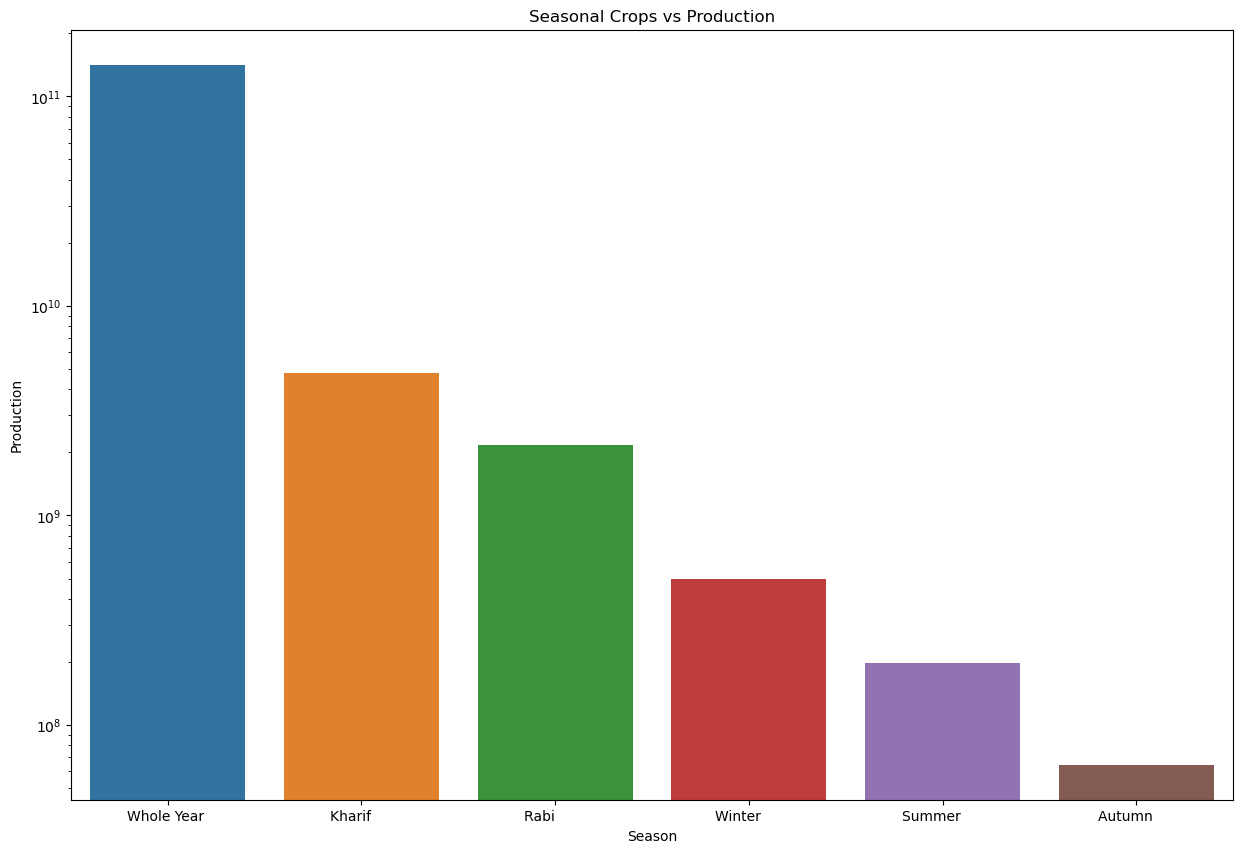

In [46]:
season = final_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15, 10))

# Use keyword arguments for x and y
sns.barplot(x=season.Season, y=season.Production, errwidth=0, ax=ax)

plt.yscale('log')
plt.title('Seasonal Crops vs Production')
plt.show()

**Result:** More productions can be witnessed in WHOLE YEAR followed by Kharif and Rabi.

### **Year vs Production Analysis**

<Axes: xlabel='Crop_Year'>

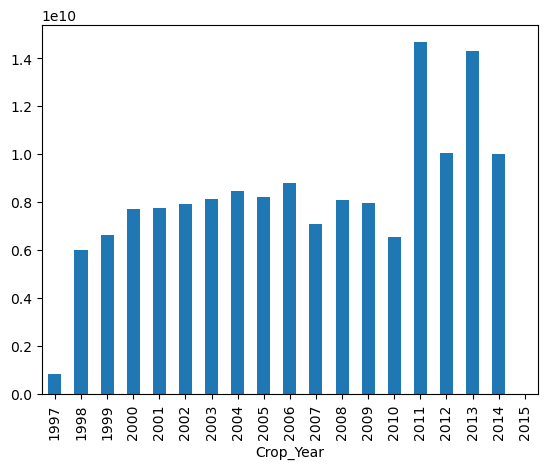

In [47]:
plt.tick_params(labelsize=10)
final_df.groupby('Crop_Year')['Production'].agg('sum').plot.bar()



**Result:** More productions was witnessed in 2011 followed by 2013.

### **Crop categories vs Production**

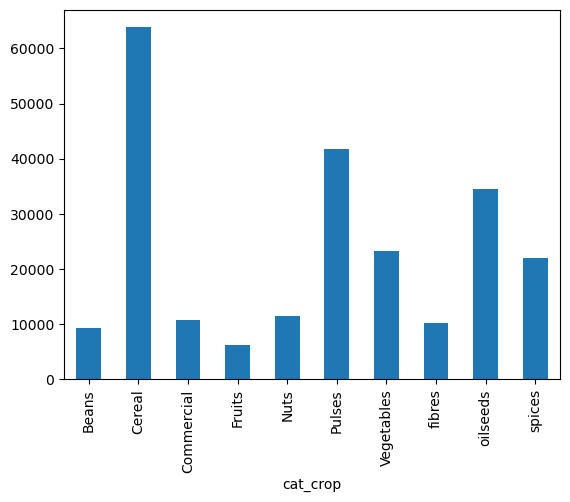

In [48]:
final_df.groupby('cat_crop')['Production'].agg("count").plot.bar()
plt.tick_params(labelsize=10)

**Result:** Cereals has the highest production followed by pulses and oilseeds

### **Season vs Crop categories vs State**

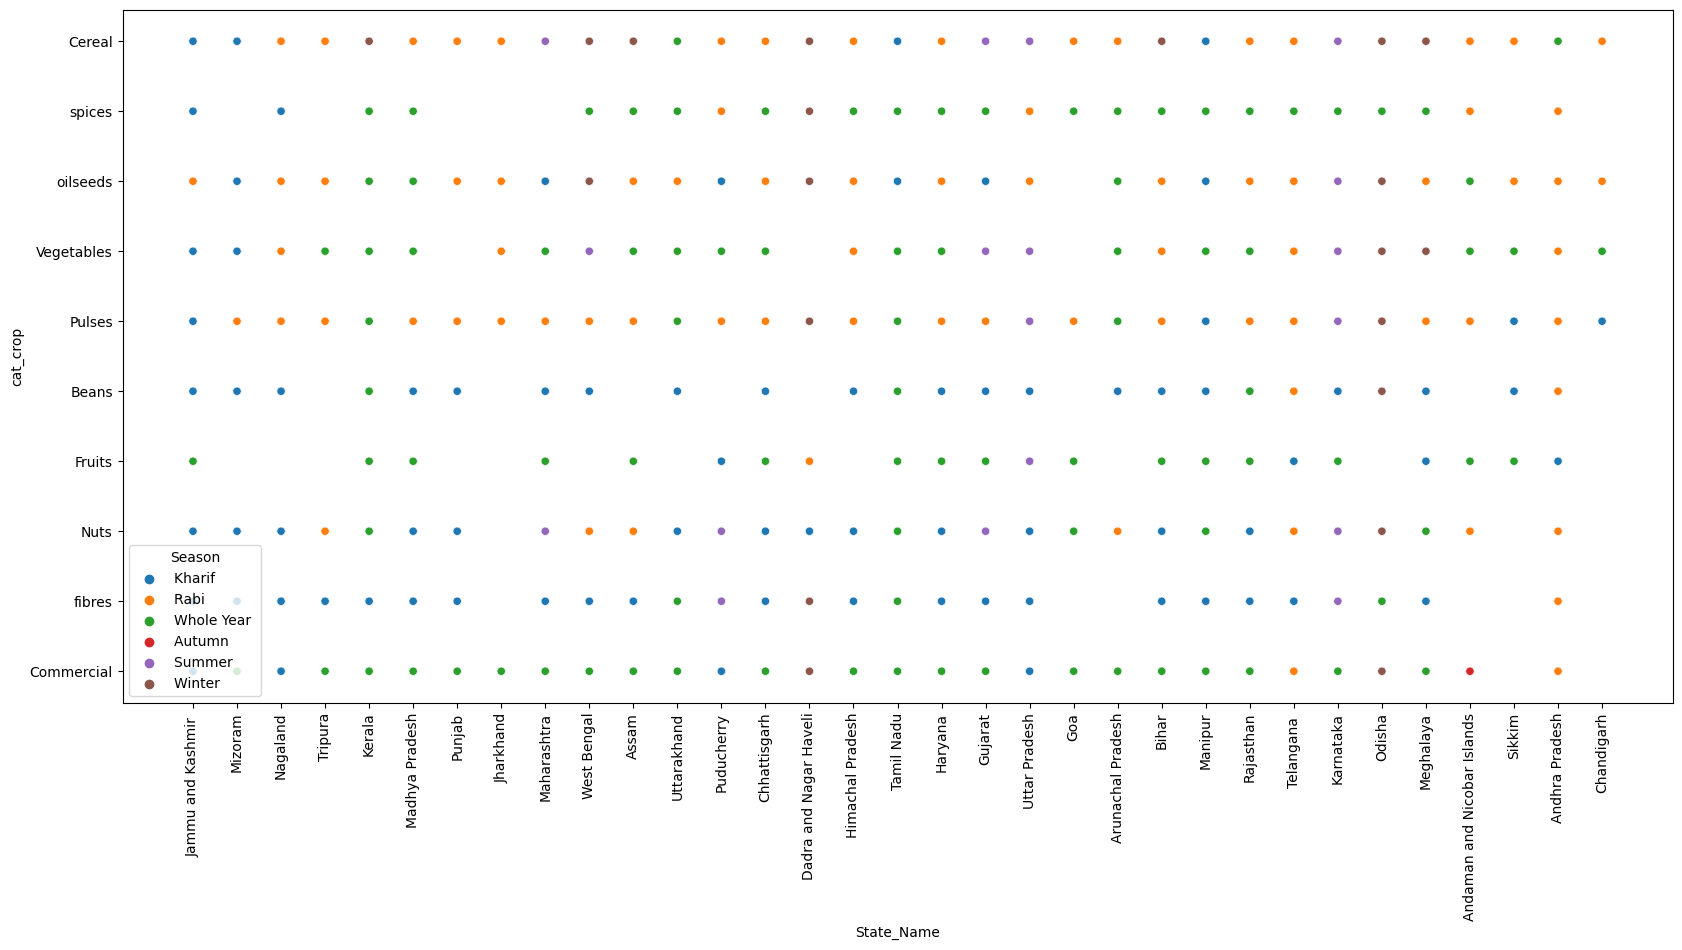

In [49]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.scatterplot(data = final_df , x="State_Name", y="cat_crop", hue='Season')
plt.show()

**Result:** Top agriculture rich state like Uttar pradesh produce abundance of Kharif crops , Kerala produces abundance of whole year crops

### **Percentage of crop categories**

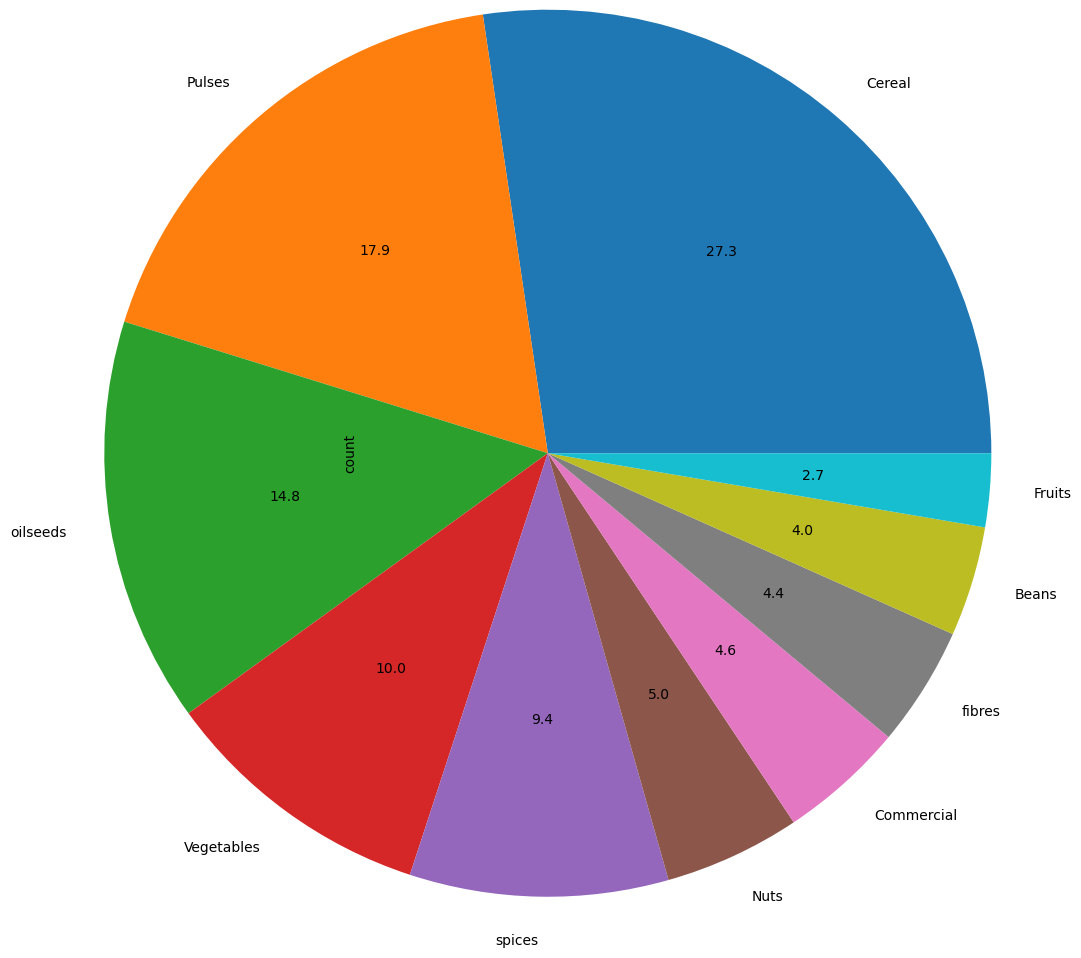

In [50]:
cat_crop_count_df=final_df["cat_crop"].value_counts()
cat_crop_count_df.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

**Result**: Cereals production was greater followed by Pulses and oilseeds

## **Key Indicators and obtaining useful insights**

### **State that dominates in crop production by producing a variety of crop categories** 

<Axes: xlabel='State_Name'>

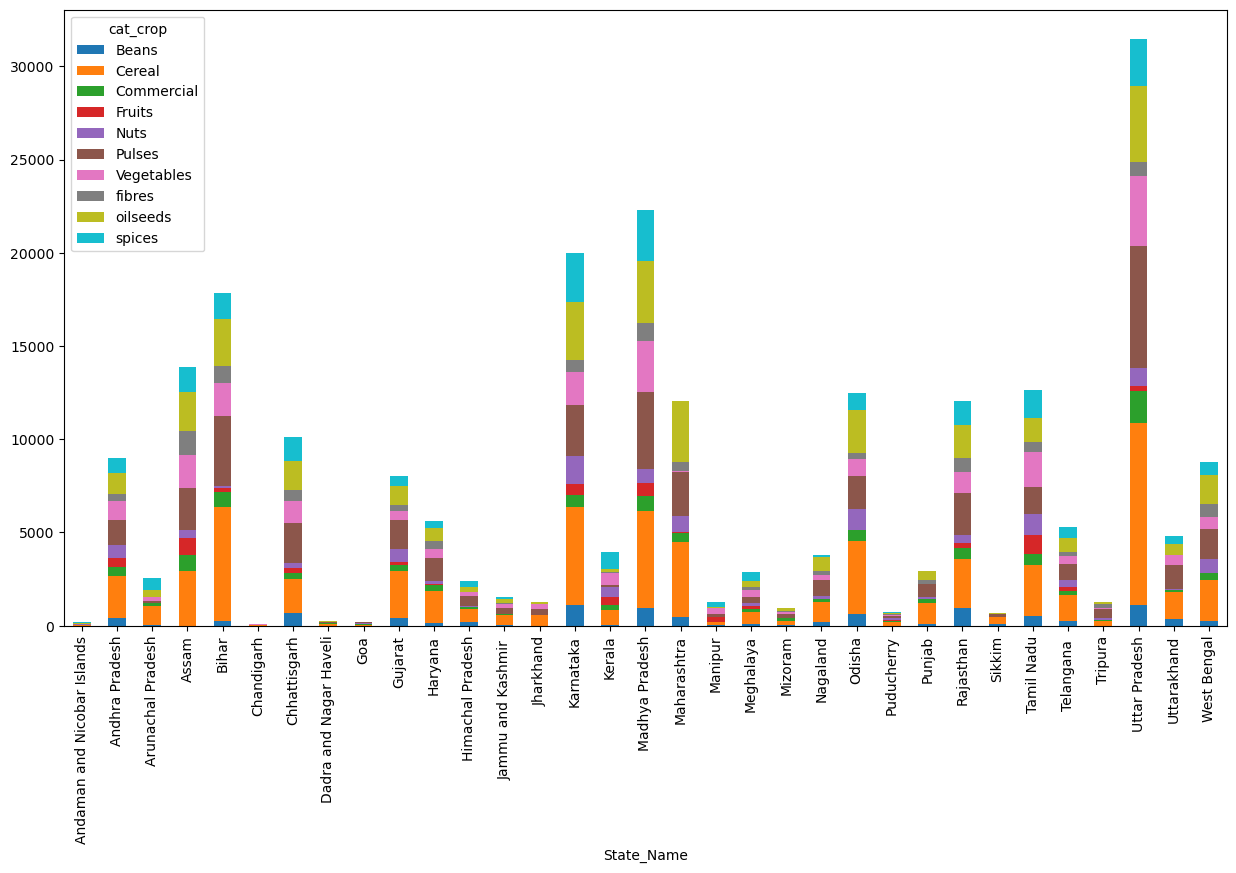

In [51]:
state_cat_crop= pd.crosstab(final_df['State_Name'],final_df['cat_crop'])
state_cat_crop.plot(kind="bar",stacked=True,figsize=(15,8))

**Result** : Uttar Pradhesh produces a various of crop categories and dominates in high production rank followed by Madhya pradesh and Karnataka

### **Which crop is grown in high frequency in India? Provide useful insights for the same**

In [52]:
final_df['Crop'].value_counts()[:5]

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: count, dtype: int64

In [53]:
rice_df=final_df[final_df['Crop']=="Rice"]
print(rice_df.shape)
rice_df.head(4)

(15104, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
74058,Jammu and Kashmir,BADGAM,1997,Kharif,Rice,27897.0,626.0,North Zone,Cereal
74062,Jammu and Kashmir,BADGAM,1999,Kharif,Rice,26568.0,34191.9,North Zone,Cereal
74067,Jammu and Kashmir,BADGAM,2000,Kharif,Rice,24907.0,39978.4,North Zone,Cereal
74075,Jammu and Kashmir,BADGAM,2001,Kharif,Rice,25245.0,44757.0,North Zone,Cereal


<Axes: xlabel='Season', ylabel='Production'>

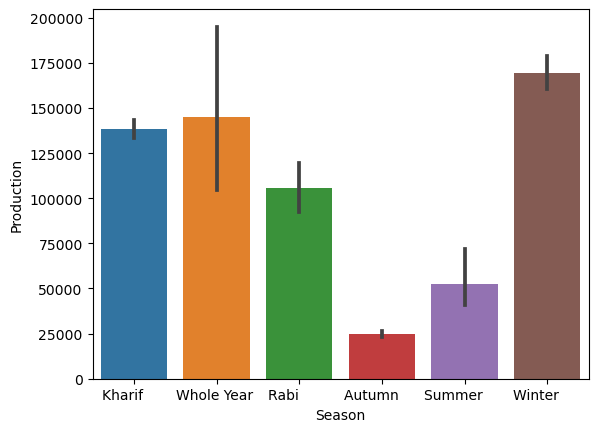

In [55]:
sns.barplot(x="Season", y="Production", data=rice_df)

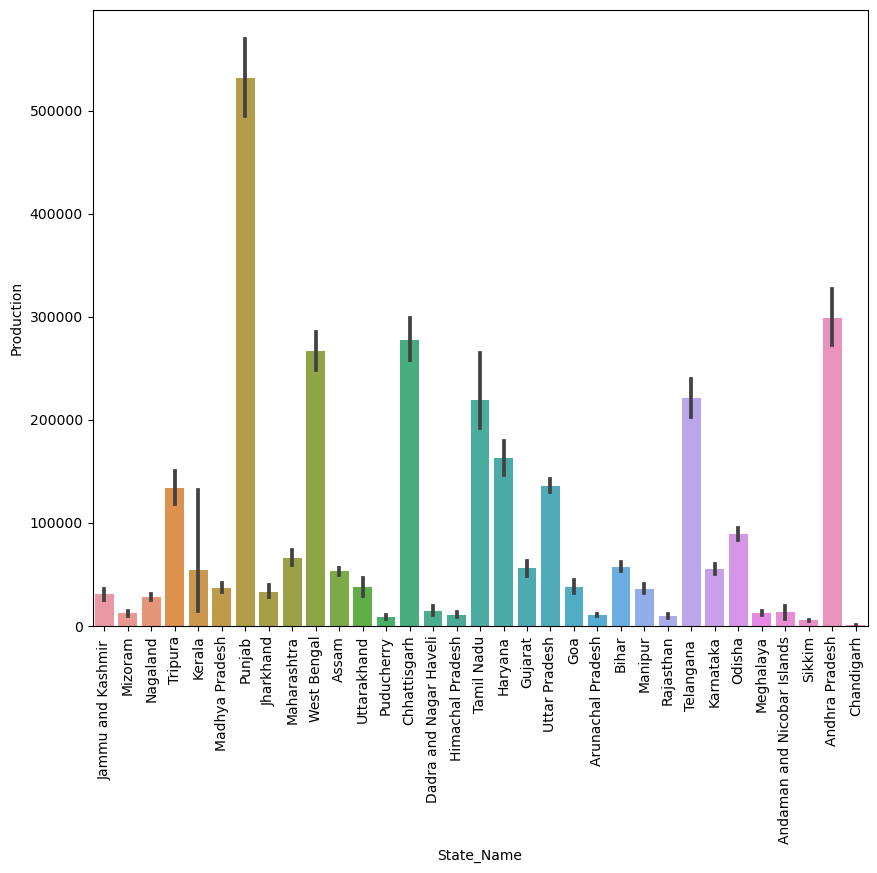

In [57]:
plt.figure(figsize=(10, 8))

# Correct usage with keyword arguments
sns.barplot(x="State_Name", y="Production", data=rice_df)

plt.xticks(rotation=90)
plt.show()

In [58]:
top_rice_dist = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_rice_dist.head(5)

,District_Name,Production
58,BARDHAMAN,3.423998e+07
375,MEDINIPUR WEST,2.919272e+07
613,WEST GODAVARI,2.784531e+07
316,KOLLAM,2.695188e+07
169,EAST GODAVARI,2.469093e+07


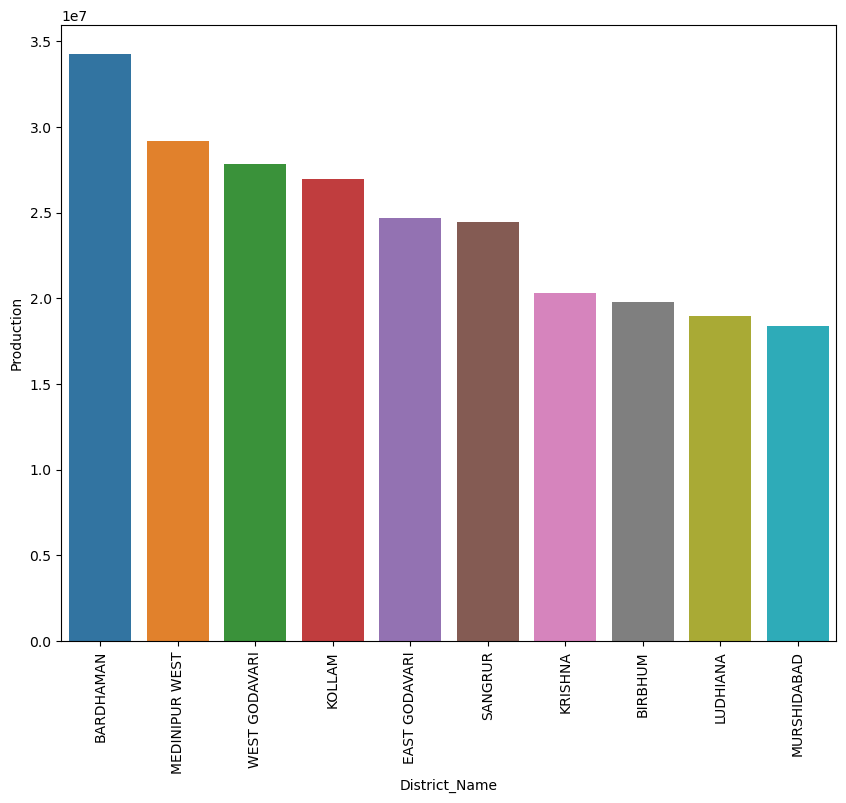

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(x="District_Name",y="Production",data=top_rice_dist[:10])
plt.xticks(rotation=90)
plt.show()

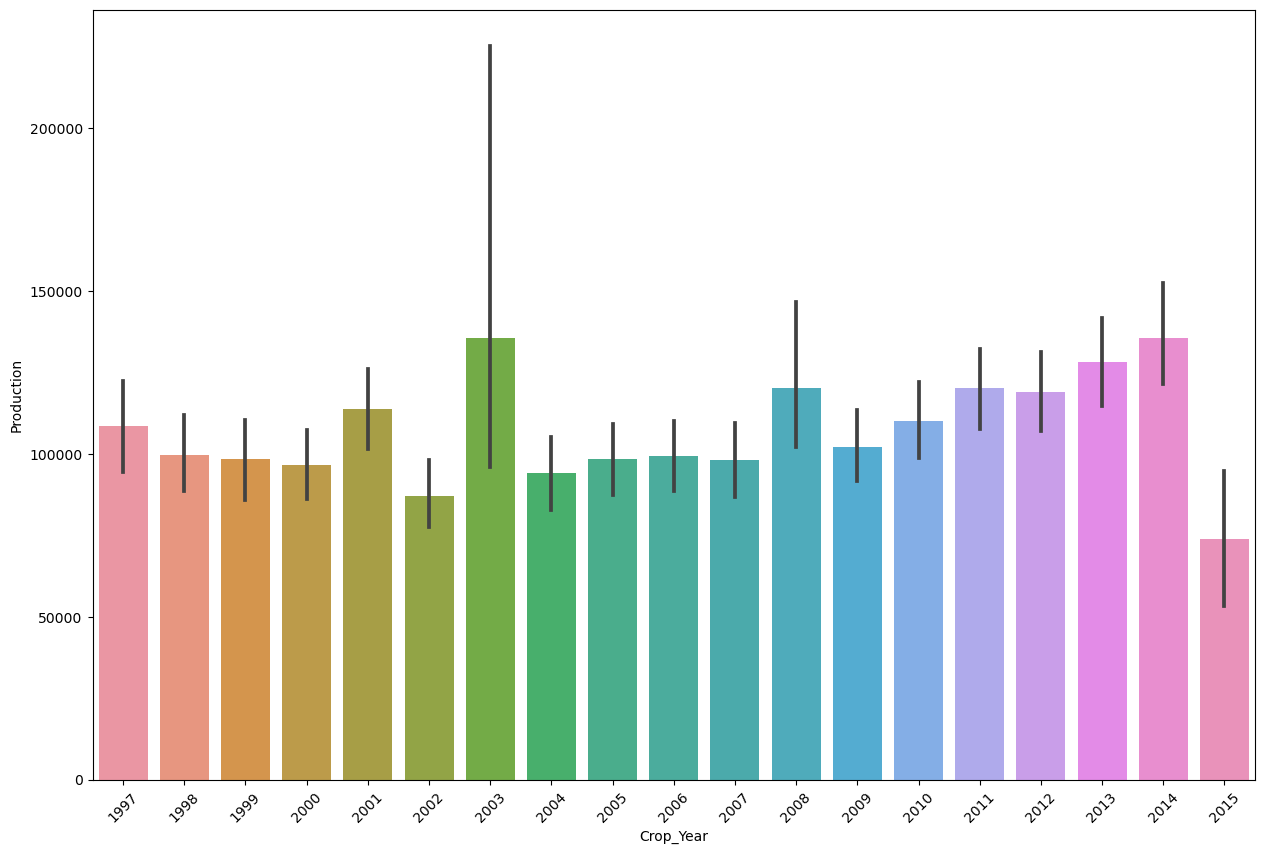

In [62]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


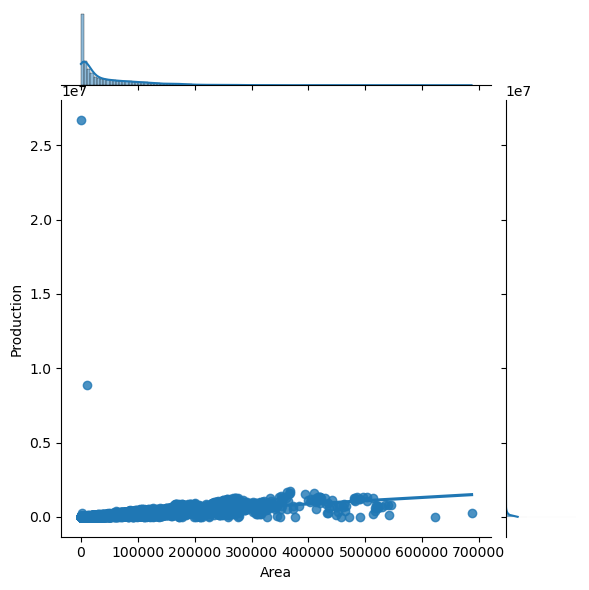

In [64]:
sns.jointplot(x="Area",y="Production",data=rice_df,kind="reg")

**Result**:
1. Rice is the most frequent crop in India.
2. Rice is produced in high is Winter season followed by Whole year and Kharif
3. Punjab is richest state for high rice production.
4. Bardaman district in Punjab is rich for rice production

### **State that ranks high in area wise crop production in India**

In [65]:
df_area=final_df.groupby("State_Name")["Area"].sum().reset_index().sort_values(by="Area",ascending=False)
df_area.head()

,State_Name,Area
30,Uttar Pradesh,4.336316e+08
16,Madhya Pradesh,3.298131e+08
17,Maharashtra,3.222062e+08
25,Rajasthan,2.720249e+08
32,West Bengal,2.154052e+08


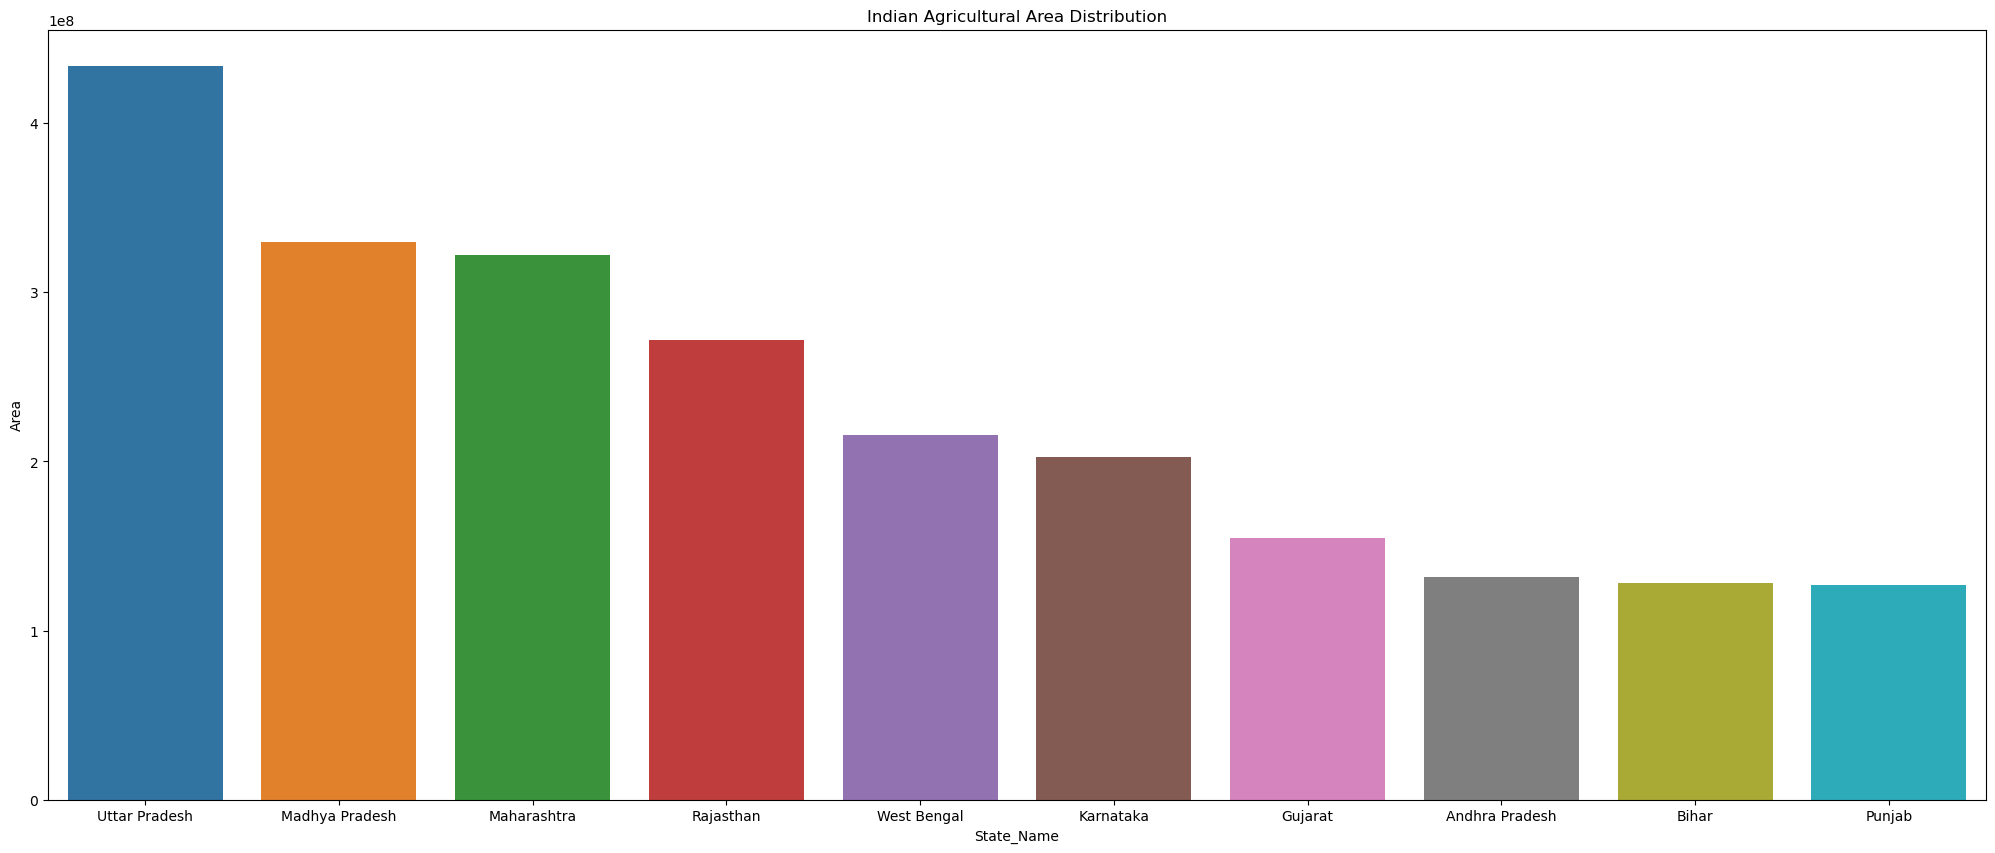

In [67]:
fig, ax = plt.subplots(figsize=(25, 10))

# Use keyword arguments for x and y
sns.barplot(x=df_area.State_Name.head(10), y=df_area.Area.head(10), errwidth=0, ax=ax)

plt.title('Indian Agricultural Area Distribution')
plt.show()


**Result:** Top crop producing states based on Area are Uttar Pradhesh followed by Madhya Pradhesh and Maharashtra

### **Top Crops produced in Northern parts of State**

In [68]:
North_Zone=final_df[final_df["Zones"]=="North Zone"]
print(North_Zone.shape)

(51468, 9)


In [69]:
North_Zone.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
74057,Jammu and Kashmir,BADGAM,1997,Kharif,Maize,12876.0,6800.0,North Zone,Cereal
74058,Jammu and Kashmir,BADGAM,1997,Kharif,Rice,27897.0,626.0,North Zone,Cereal
74059,Jammu and Kashmir,BADGAM,1997,Rabi,Wheat,645.0,580.0,North Zone,Cereal
74060,Jammu and Kashmir,BADGAM,1999,Kharif,Cond-spcs other,143.0,106.0,North Zone,spices
74061,Jammu and Kashmir,BADGAM,1999,Kharif,Maize,14164.0,7030.0,North Zone,Cereal


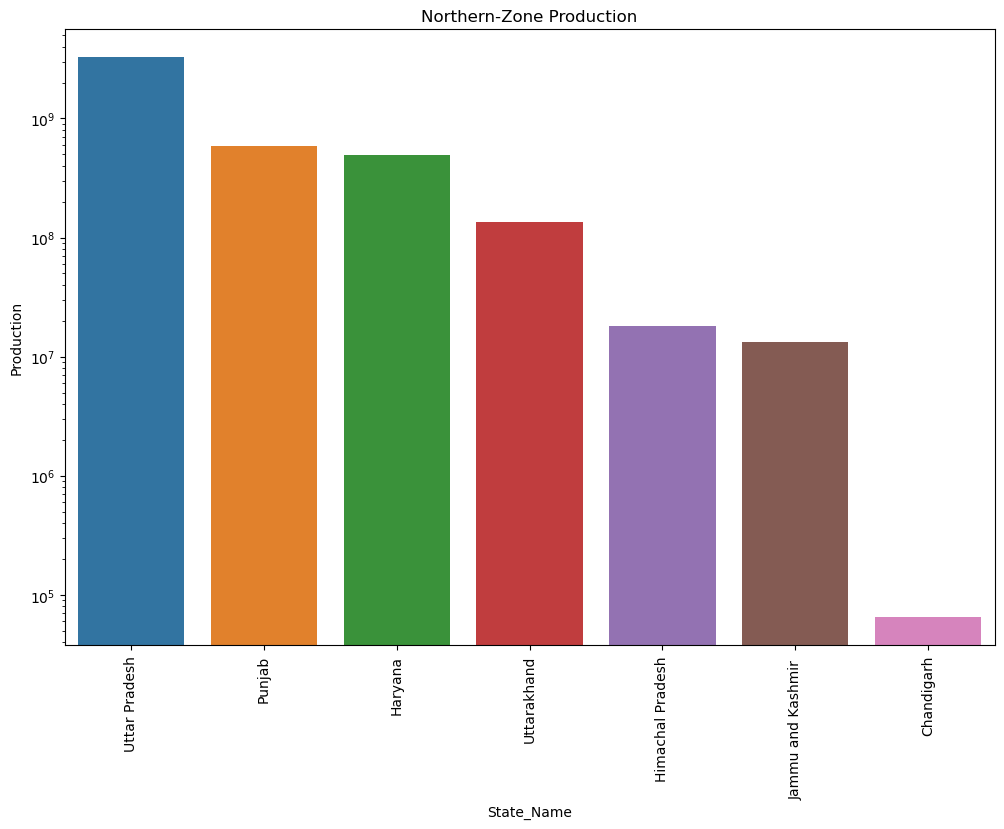

In [71]:
grouped_data = North_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

# Plotting the bar plot with keyword arguments
plt.figure(figsize=(12, 8))  # Optional: adjust figure size if needed
sns.barplot(x='State_Name', y='Production', data=grouped_data)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Set y-axis to log scale if needed
plt.yscale('log')

# Set title
plt.title('Northern-Zone Production')

# Show the plot
plt.show()


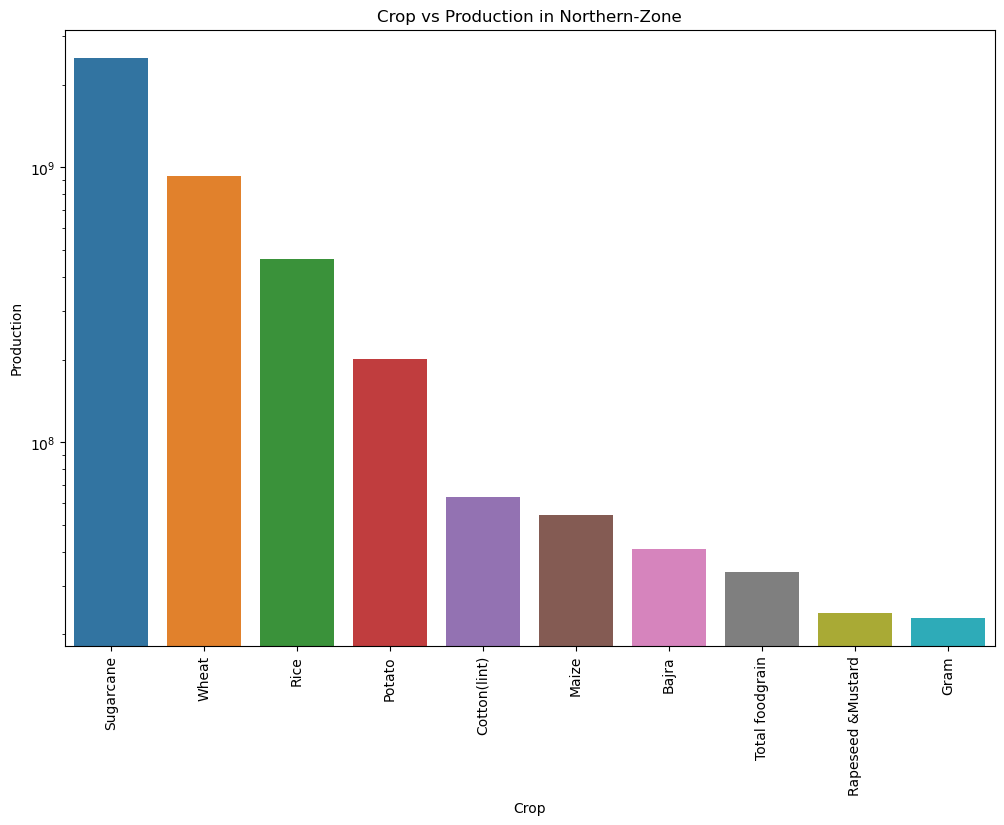

In [73]:
df_NZ = North_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production", ascending=False).head(10)

# Plotting the bar plot with keyword arguments
plt.figure(figsize=(12, 8))  # Optional: adjust figure size if needed
sns.barplot(x='Crop', y='Production', data=df_NZ)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Set y-axis to log scale if needed
plt.yscale('log')

# Set title
plt.title('Crop vs Production in Northern-Zone')

# Show the plot
plt.show()

**Result**:
1. Top crop producing states in North parts are Punjab followed by Uttar pradhesh
2. Top crops produced in Northern zone are Sugar cane followed by Wheat. 

### **Top crop produced in Southern Zone**

In [74]:
South_Zone=final_df[final_df["Zones"]=="South Zone"]
print(South_Zone.shape)

(54207, 9)


In [75]:
South_Zone.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
101663,Kerala,THRISSUR,1997,Whole Year,Arecanut,6238.0,9140.0,South Zone,Nuts
101664,Kerala,THRISSUR,1997,Whole Year,Black pepper,5958.0,1046.0,South Zone,spices
101665,Kerala,THRISSUR,1997,Whole Year,Cashewnut,4658.0,2301.0,South Zone,Nuts
101666,Kerala,THRISSUR,1997,Whole Year,Coconut,75784.0,482000.0,South Zone,None
101667,Kerala,THRISSUR,1997,Whole Year,Tapioca,3087.0,76277.0,South Zone,Vegetables
101668,Kerala,THRISSUR,1998,Autumn,Rice,10019.0,17623.0,South Zone,Cereal
101669,Kerala,THRISSUR,1998,Kharif,Sesamum,148.0,70.0,South Zone,oilseeds
101670,Kerala,THRISSUR,1998,Summer,Rice,6196.0,14233.0,South Zone,Cereal
101671,Kerala,THRISSUR,1998,Whole Year,Arecanut,5450.0,5750.0,South Zone,Nuts
101672,Kerala,THRISSUR,1998,Whole Year,Banana,2475.0,35071.0,South Zone,Fruits


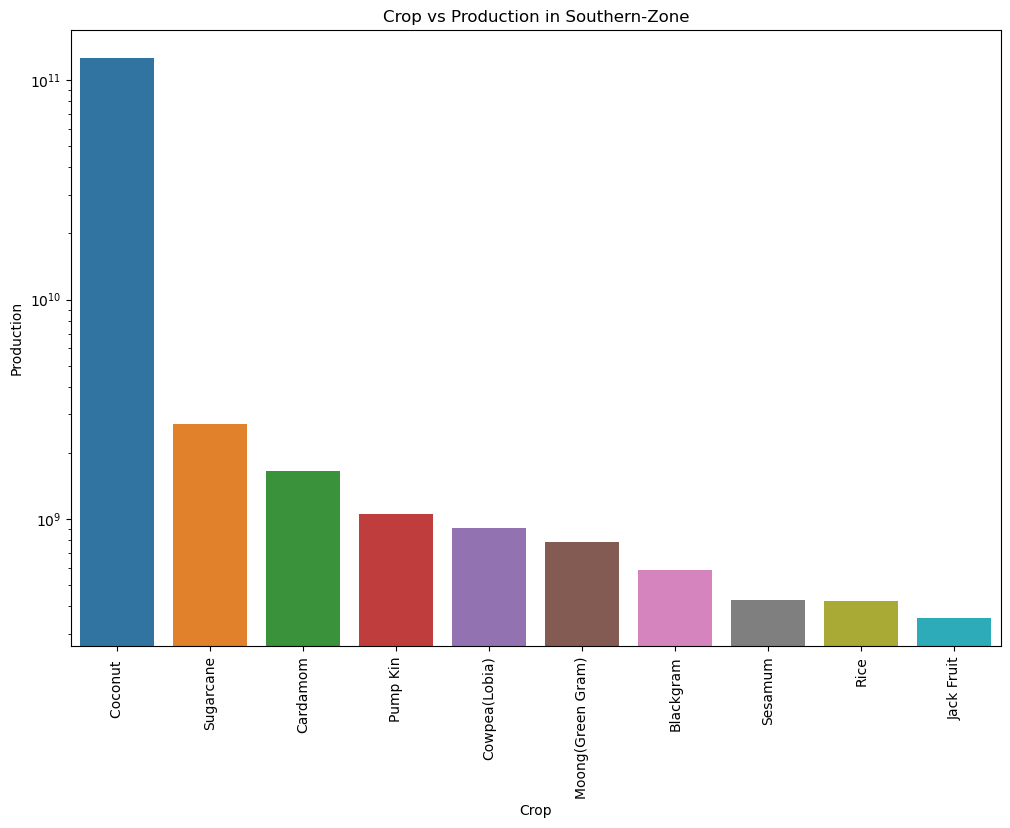

In [77]:
df_SZ = South_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production", ascending=False).head(10)
# Plotting the bar plot with keyword arguments
plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Production', data=df_SZ)
# Rotate x-axis labels if needed
plt.xticks(rotation=90)
# Set y-axis to log scale if needed
plt.yscale('log')
# Set title
plt.title('Crop vs Production in Southern-Zone')
# Show the plot
plt.show()

In [78]:
df_coco = final_df[final_df["Crop"]=="Coconut "]
print(df_coco.shape)
df_coco[:5]

(1985, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
101666,Kerala,THRISSUR,1997,Whole Year,Coconut,75784.0,482000.0,South Zone,None
101675,Kerala,THRISSUR,1998,Whole Year,Coconut,81171.0,534000000.0,South Zone,None
101689,Kerala,THRISSUR,1999,Whole Year,Coconut,88307.0,610000000.0,South Zone,None
101702,Kerala,THRISSUR,2000,Whole Year,Coconut,89472.0,540000000.0,South Zone,None
101716,Kerala,THRISSUR,2001,Whole Year,Coconut,85480.0,545000000.0,South Zone,None


<Axes: xlabel='Season', ylabel='Production'>

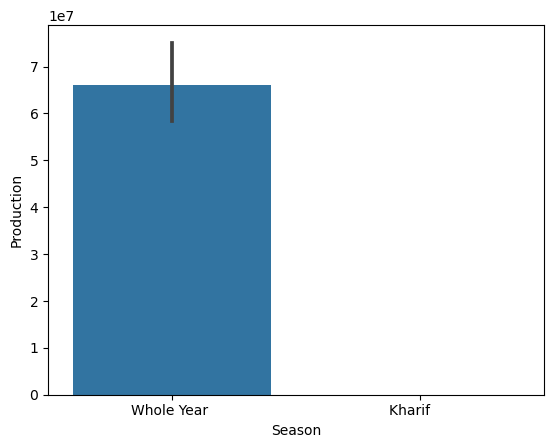

In [80]:
sns.barplot(x="Season",y="Production",data=df_coco)

<function matplotlib.pyplot.show(close=None, block=None)>

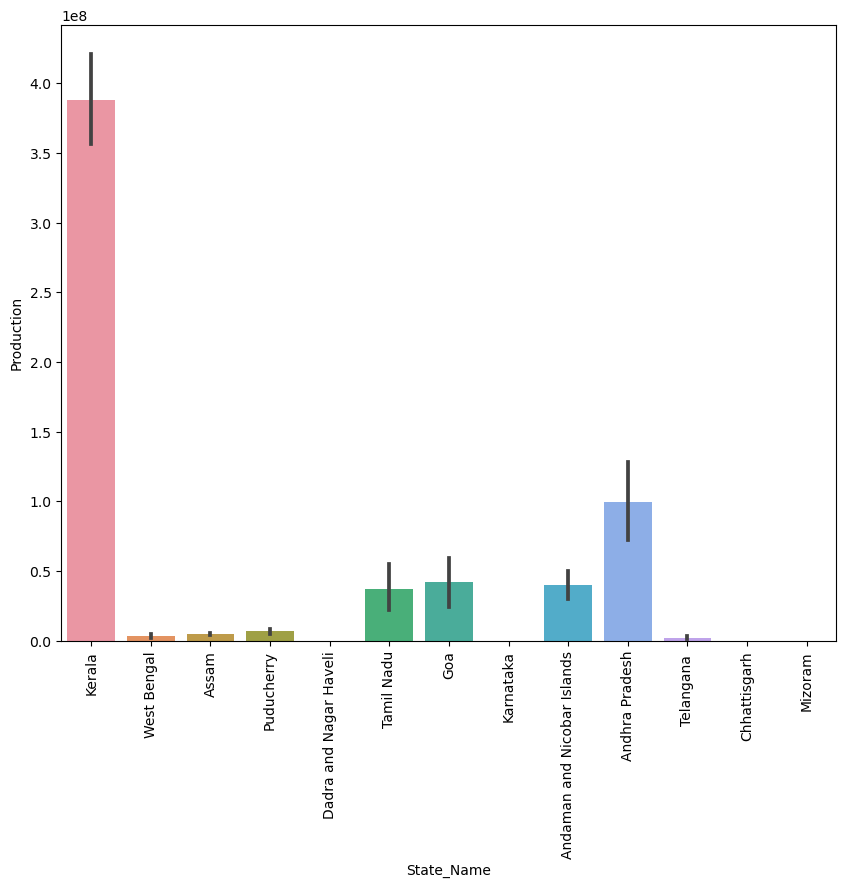

In [81]:
plt.figure(figsize=(10,8))
sns.barplot(x="State_Name",y="Production",data=df_coco)
plt.xticks(rotation=90)
plt.show

In [82]:
top_coco_dist = df_coco.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_coco_dist.head(5)

,District_Name,Production
80,KOZHIKODE,1.527871e+10
89,MALAPPURAM,1.451252e+10
134,THIRUVANANTHAPURAM,1.001337e+10
136,THRISSUR,9.920739e+09
66,KANNUR,9.780310e+09


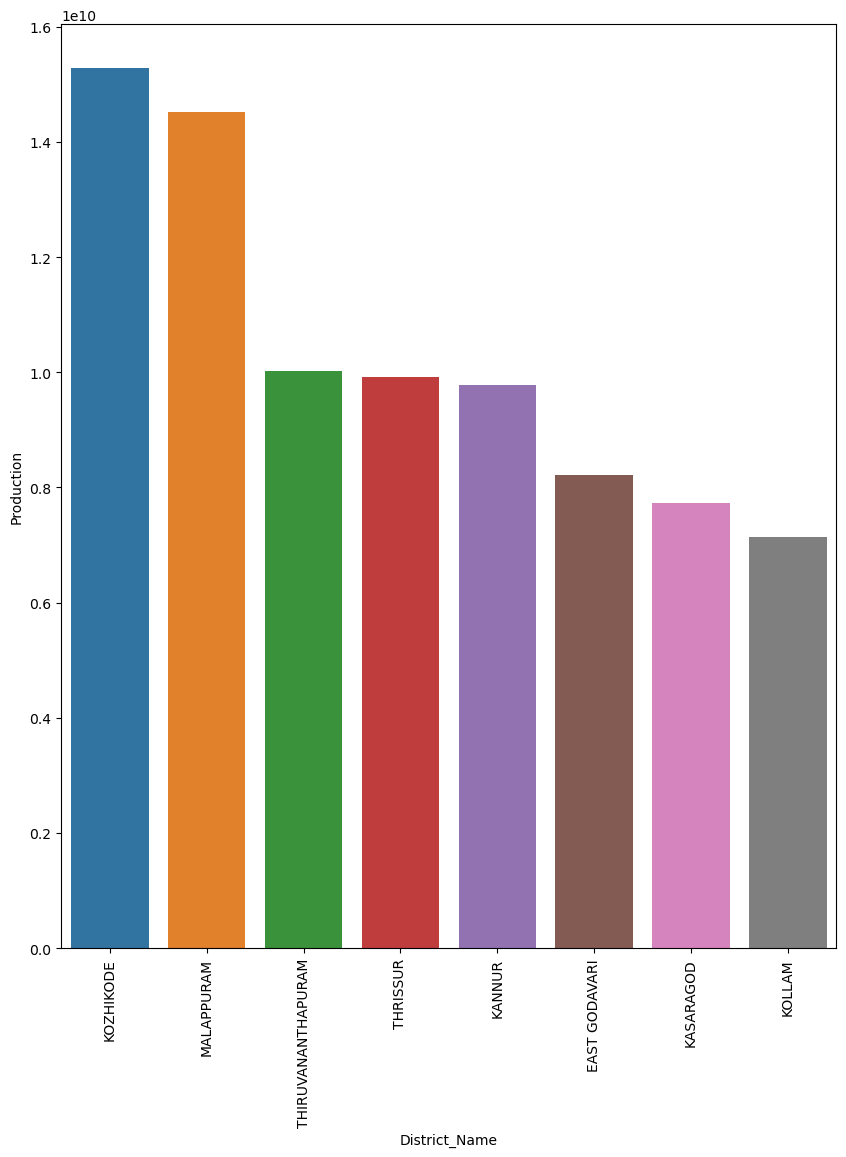

In [84]:
plt.figure(figsize=(10,12))
sns.barplot(x="District_Name",y="Production",data=top_coco_dist[:8])
plt.xticks(rotation=90)
plt.show()

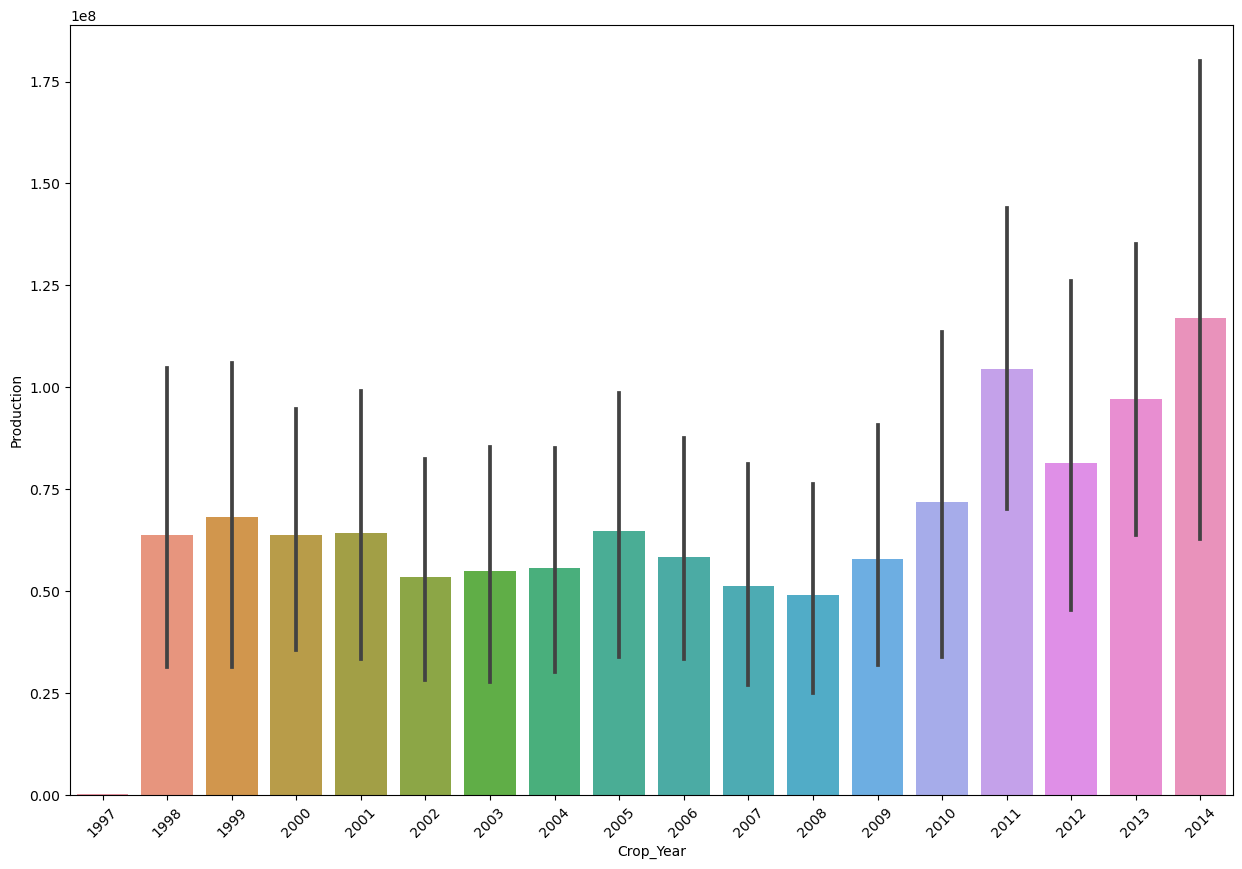

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=df_coco)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1000 with 0 Axes>

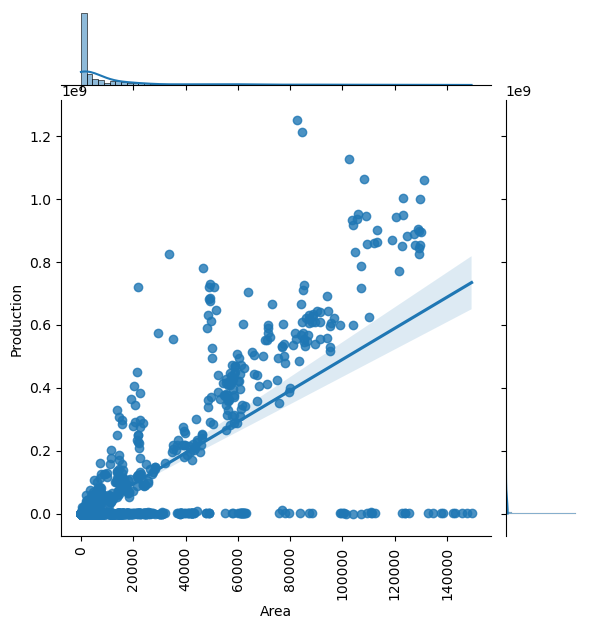

In [86]:
plt.figure(figsize=(15,10))
sns.jointplot(x="Area",y="Production",data=df_coco,kind="reg")
plt.xticks(rotation=90)
plt.show()

**Result:** 
1. Top crop grown in Southern Zone is coconut.
2. The coconut gets matured in Whole year season
3. Kerala state in southern zone yeilds a high amount of Coconut
4. Kozhikode and Malapuram districts of Kerala are rich in Coconut production
5. Coconut production was yeilded more during 2011 and 2014.
6. High coconut cultivation is directly proportional to area under cultivation.


### **Top crop produced in Central state**

In [87]:
Central_Zone=final_df[final_df["Zones"]=="Central Zone"]
print(Central_Zone.shape)

(33652, 9)


In [88]:
Central_Zone.head(8)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
121819,Madhya Pradesh,SHEOPUR,1998,Kharif,Arhar/Tur,1600.0,1600.0,Central Zone,Pulses
121820,Madhya Pradesh,SHEOPUR,1998,Kharif,Bajra,11700.0,18700.0,Central Zone,Cereal
121821,Madhya Pradesh,SHEOPUR,1998,Kharif,Groundnut,1100.0,1100.0,Central Zone,Nuts
121822,Madhya Pradesh,SHEOPUR,1998,Kharif,Jowar,4200.0,5100.0,Central Zone,Cereal
121823,Madhya Pradesh,SHEOPUR,1998,Kharif,Maize,1000.0,1000.0,Central Zone,Cereal
121824,Madhya Pradesh,SHEOPUR,1998,Kharif,Rice,4300.0,2700.0,Central Zone,Cereal
121825,Madhya Pradesh,SHEOPUR,1998,Kharif,Sesamum,2800.0,800.0,Central Zone,oilseeds
121826,Madhya Pradesh,SHEOPUR,1998,Kharif,Soyabean,43300.0,50900.0,Central Zone,Beans


Text(0.5, 1.0, 'Top crop produced in Central zone')

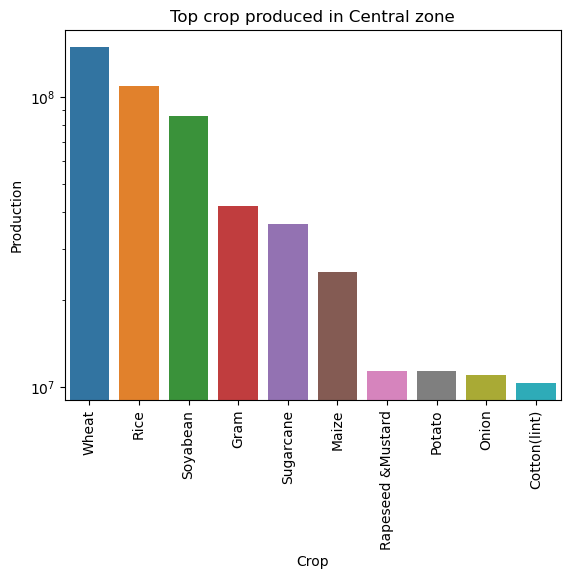

In [90]:
df_central_crop = Central_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(x="Crop",y="Production",data=df_central_crop)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top crop produced in Central zone")

In [91]:
sns.barplot(Central_Zone.State_Name,Central_Zone.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Central-Zone Production')
Central_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

**Result:** 
1. Wheat is the top crop produced in Central Zone
2. State rich in Wheat production is Madhya Pradesh

### **Crop categories and their Production rate**

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data=final_df, x='cat_crop', y='Production')

plt.title('Crop categories vs Production rate')
plt.xlabel('Crop categories')
plt.ylabel('Production')
plt.xticks(rotation=90);
plt.yscale('log')

plt.show()

final_df.groupby(by='cat_crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

**Result:** Commercial crops like Tobacco , Coffee , Tea , Rubber and Sugar cane has given the largest production